# Pymaceuticals Inc.
---

## Analysis

### PyCity Schools Analysis
- Pymaceuticals, Inc. began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.  The purpose of this study is to compare the performance of its drug of interest, Capomulin, against the other treatments.  The executive team of Pymaceuticals has asked for (1) tables and figures needed for a technical report of the clinical study, and (2) a top-level summary of the study results.
- Tables and figures are provided below.
- A complete data set from a recent animal clinical study was collected and provided in two .csv files which were merged into one.  The data set included data representative of 249 mice who were identified with SCC tumors received treatment from a range of nine drugs: Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, and Zoniferol; a placebo was also included in the study.  In addition, the data comprised of 1,893 rows with the following series of data: Mouse ID, Timepoint (in days), Tumor Volume (in cubic mm), metastatic sites, drug regimen, sex, age (in months), and weight (in grams).
- Firstly, the integrity of the data was performed and cleaned to ensure there were no redundances.  It was determined that there were duplicate time points for one female mouse identified as ‘g989’ who was being treated with Propriva (which was subsequently removed from the analysis).  All data corresponding to this mouse was dropped, thereby reducing the number of mice and number of rows in the data to 248 and 1,880, respectively.
- Secondly, a statistical summary of the data is presented in which the mean, median, variance, standard deviation, and standard error of the mean (SEM) of tumor volume determined was each drug and the placebo. From these measurements it was determined that the following four drugs had the lowest standard deviation (shown in parentheses) of tumor volume including Ceftamin, the drug of interest: Ramicane (4.846 mm3), Capomulin (4.994 mm3), Ceftamin (6.268 mm3), and Infubinol (6.567 mm3).  Having the lowest standard deviation is favorable for Ceftamin because the collected data has a high level of consistency and low variability.
- Thirdly, bar charts and pie charts are presented.  The bar charts present the number of observed mouse timepoints for each drug in descending order. A review of these reflect that the drug of interest Capomulin had the greatest number of timepoints (230) and Propriva (148) had the lowest; the numerical measurements are not included in the charts.  Of note, Ramicane had nearly the same amount of timepoints (228) as Capomulin The pie charts indicate that the population of the 248 mice was nearly evenly divided with 51.0 percent being male and 49.0 percent being female.
- Fourthly, box plots created as a function of quartiles and outliers (if any) provide a visual presentation of the distribution of the tumor volumes responsive to the drug regimens for Ceftamin, Ramicane, Capomulin, and Infubinol, the four drugs producing the lowest standard deviations; the other five drugs and placebo were excluded from further analysis.  With respect to 75-25 percent quartiles, a visual comparison between Capomulin and Ramicane indicates a smaller box for the former over the latter.  Similar to the results reflected in the standard deviations, this supports the favorability of the data as did the standard devastations.   The medians revealed in both boxes indicate data is more favorable for Ramicane than Capomulin because the latter has more skewness.  Neither of these produced any outliers (Infubinol produced the only outlier).
- Lastly, a scatter plot of mouse weight vs. average tumor volume for Capomulin reveals a positive correlation between mouse weight and tumor size.  A regression analysis of the two variables reveals a correlation between mouse weight and the average tumor size equal to 0.84.  This is considered a strong correlation and reflective of a strong linear relationship. Generally and succulently speaking, heavier mice have larger tumors.
  
### Conclusion
 - The visual indictors of the data reflect that Capomulin and Ramicane perform similarly.  Although similar, neither drug exceeds the other in all measurements; however, the similarity of results indicate that Capomulin could be an alternative drug to Ramicane if line plots of the other 27 mice reveal similar pattern using the same measurements of tumor volume.  If additional line plots reveal the same or similar patterns with commensurate measurements, Pymaceuticals has produced an alternative drug for the treatment of SCC and should consider marketing Capomulin as an alternative to Ramicane.

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)  # results show 249 rows
study_results = pd.read_csv(study_results_path)    # results show 1893 rows

# Combine the data into a single DataFrame

            # Instructions shou using indexing of study_results; left = study_results & right = mouse_metadata
combined_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'], sort=False)  # results show 1893 rows

# Display the data table for preview
combined_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [109]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()


249

In [110]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


######################## DROP before SUBMITTING ##############
# No need to convert Timepoint to object from int64 to match Mouse ID 
# combined_df['Timepoint'] = combined_df['Timepoint'].astype(object)
# print(combined_df_study.dtypes)
######################## DROP before SUBMITTING ##############

            # Identify dupliate rows
duplicateRows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

            # find the unique names of the duplicate rows in Mouse ID
duplicateRows['Mouse ID'].unique()


array(['g989'], dtype=object)

In [111]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows1 = combined_df.loc[combined_df['Mouse ID'] == 'g989',:]
duplicateRows1


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop(combined_df.index[combined_df['Mouse ID'] == 'g989'], inplace=True)
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice in the clean DataFrame.
combined_df['Mouse ID'].nunique()


248

## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

import numpy as np

drug_tumor_mean = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].mean()
drug_tumor_median = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].median()
drug_tumor_var = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].var()
drug_tumor_std = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].std()
drug_tumor_sem = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].sem()

drug_tumor_concat_df = pd.concat([
    drug_tumor_mean.rename('Mean Tumor Volume'),
    drug_tumor_median.rename('Median Tumor Volume'), 
    drug_tumor_var.rename('Tumor Volume Variance'), 
    drug_tumor_std.rename('Tumor Volume Std. Dev.'), 
    drug_tumor_sem.rename('Tumor Volume Std. Err.')
], axis=1)

drug_tumor_concat_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [133]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

            # For personal knowledge, here's a table generated in two lines to understand the flow of syntax for generating one line
                #aggfuncs = [ 'mean', 'median', 'std', 'var', 'sem']
                #combined_df.groupby('Drug Regimen', dropna=False)['Tumor Volume (mm3)'].agg(aggfuncs)

            # For personal knowledge, here are styles generated in two lines to understand the flow of syntax for generating one line
                # #styles = [dict(selector='caption',
                # props=[('text-align', 'right'),
                #        ('font-weight', 'bold')])]
                # df.style.set_caption('Members').set_table_styles(styles)

combined_df.style.set_caption('Tumor Volume (mm3)')

            # Here's the answer to the challenge of this cell!
combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem']).style.set_caption('Tumor Volume (mm3)').set_table_styles([dict(selector='caption',props=[('text-align', 'right'),('font-weight', 'bold')])])
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Bar and Pie Charts

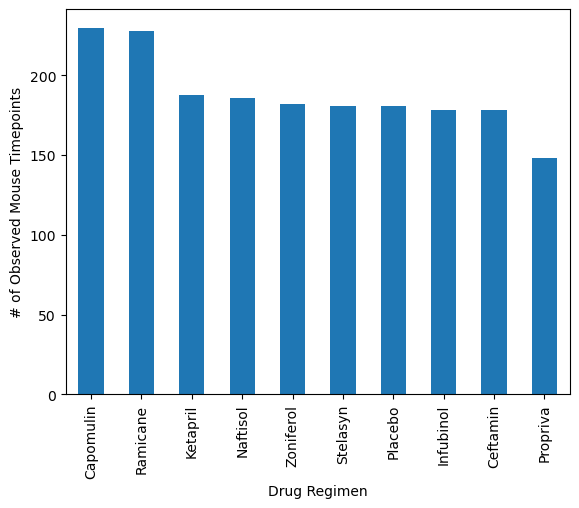

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

            # The following commented codeproduces same table except Placebo & Stelansyn and Ceftamin & Infubinol are in different sequnence.
            # regimen_mouse_timepoints_df = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].count().sort_values(ascending=False)

regimen_mouse_timepoints_df = combined_df['Drug Regimen'].value_counts()
regimen_mouse_timepoints_df.plot(kind='bar', 
                                 figsize=(6.5,5)
                                )
plt.xlabel('Drug Regimen')           
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()
regimen_mouse_timepoints_df


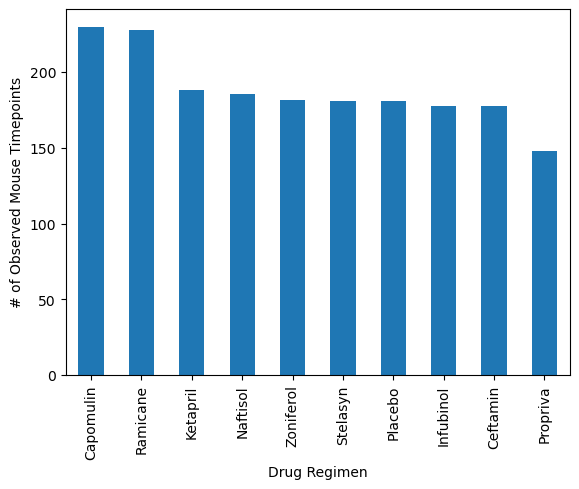

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_mouse_timepoints_df.plot(kind='bar', 
                                 ylabel='# of Observed Mouse Timepoints', 
                                 xlabel='Drug Regimen', 
                                 figsize=(6.5, 4.75)
                                )
plt.show()


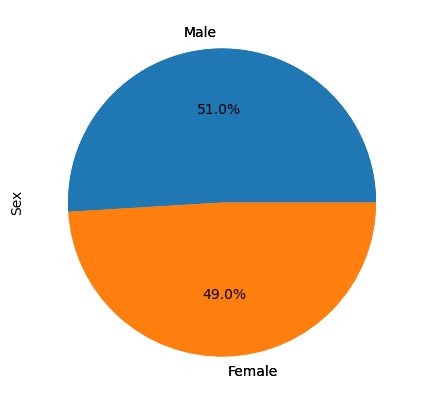

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse_timepoints_df = combined_df.groupby(combined_df['Sex'], as_index=True, sort=True)['Sex'].count().sort_values(ascending=False)
sex_mouse_timepoints_df.plot(kind='pie', 
                             figsize=(6.5,5))
sex_mouse_timepoints_pandas_df = sex_mouse_timepoints_df.plot(kind= 'pie', 
                                                              y='Sex',
                                                              autopct='%.1f%%'
                                                             )


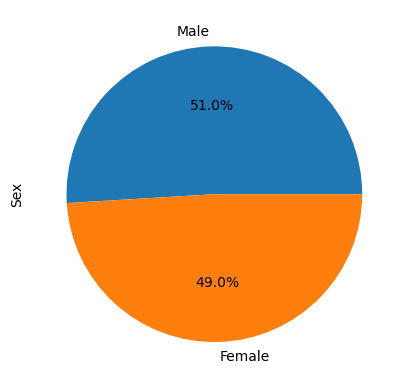

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse_timepoints_df.plot(kind='pie',
                             autopct='%1.1f%%'
                            )
plt.show()


## Quartiles, Outliers and Boxplots

In [131]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = combined_df.groupby(['Mouse ID'], as_index=True, sort=True)['Timepoint'].max() 

            # Moving the Mouse ID from index to first column to prep for merge; index resets to 0
mouse_timepoint_df = mouse_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_combinied_df = mouse_timepoint_df.merge(combined_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_combinied_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']    # no need to drop other siz drugs

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:     # for each drug in list of treatments

    # Locate the rows which contain mice on each drug and get the tumor volumes
    per_drug_tumor_vol = merged_combinied_df.loc[merged_combinied_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(per_drug_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = per_drug_tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = per_drug_tumor_vol.loc[(per_drug_tumor_vol < lower_bound) | (per_drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential ouliers: {outliers}")
print()


Capomulin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential ouliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



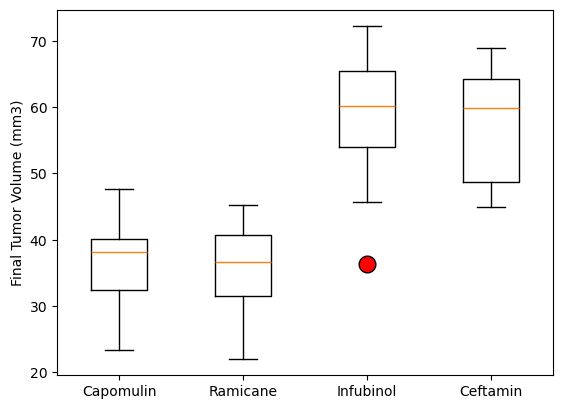

In [122]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots(figsize=(6.4,4.75))

                # rectangular box plot
ax1.boxplot(tumor_vol_data,
            vert=True,               # vertical box alignment
            patch_artist=False,      # don't fill boxes with color
            labels=treatments,
            flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}   # produces red outlier circle symbol 
           ) 
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

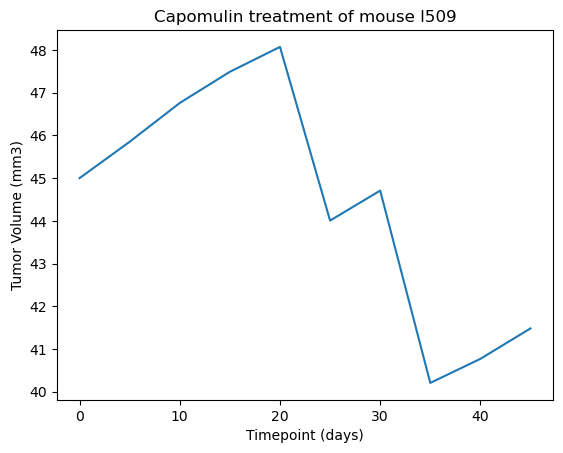

In [123]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

            # Separing l509_rows from cominbed_df_df
l509_df = combined_df[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']] 
l509_df = l509_df.loc[l509_df['Mouse ID'] == 'l509']
l509_df_timepoint = l509_df[['Timepoint']]
l509_df_tumor_vol = l509_df[['Tumor Volume (mm3)']] 

tumor_vol_v_timepoint, = plt.plot(l509_df_timepoint, 
                                  l509_df_tumor_vol)
plt.xlabel('Timepoint (days)')           
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


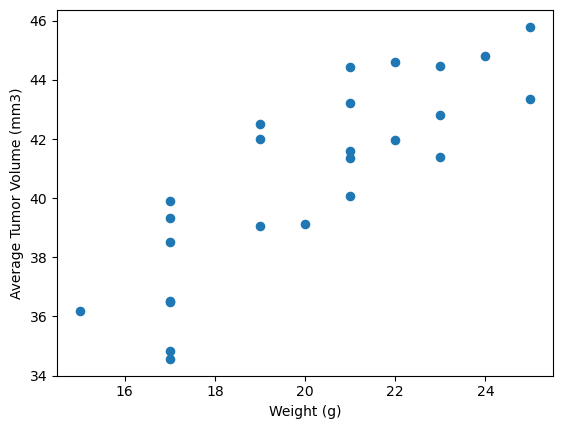

In [124]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

            # Start by getting the average tumor volume for each Drug Regimen
avg_tumor_vol_df = combined_df.groupby(['Drug Regimen', 'Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean() 

            # Moving the Drug Regimen from index to first column to apply Capomulin to Drug Regimen; index resets to 0
avg_tumor_vol_df = avg_tumor_vol_df.reset_index()

Capomulin_avg_tumor_vol_df = avg_tumor_vol_df.loc[avg_tumor_vol_df['Drug Regimen'] == 'Capomulin']

fig, ax1 = plt.subplots(figsize=(6.4,4.75))

                # Scatter plot
plt.scatter(Capomulin_avg_tumor_vol_df['Weight (g)'],
            Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)'], 
            s=35            #  s=size of marker
           ) 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84



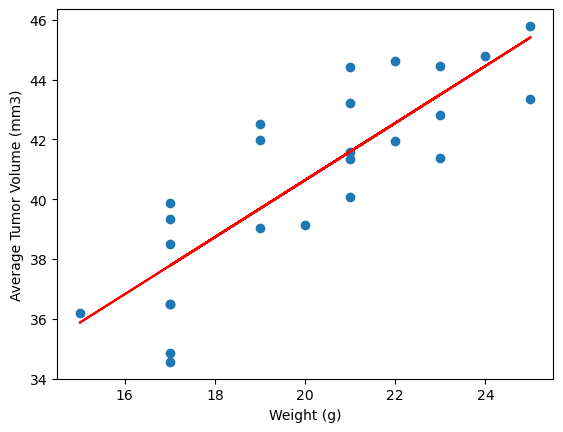

In [125]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

            # Importing to use linregress
from scipy.stats import linregress

                # Scatter plot
x_values = Capomulin_avg_tumor_vol_df['Weight (g)']
y_values = Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(regress_values,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show;             # ; prevents <function matplotlib.pyplot.show(close=None, block=None)> from being disaplyed

correlation = Capomulin_avg_tumor_vol_df['Weight (g)'].corr(Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)'])
correlation = correlation.round(2)
print(f"The correlation between mouse weight and the average tumor volume is", correlation)
print()
